In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Mount GDrive to /content/drive</h3></center><br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [ ]:
%%capture
!pip install ultralytics
!pip install clearml
!pip install nbconvert

In [ ]:
%%capture
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=ZH30BNGYGBQ529Z3UM35
%env CLEARML_API_SECRET_KEY=f3Kqvyou2LtebgPcnjLq45j4i6kzX54HkYABw7nzTyGOPEDX2k

In [ ]:
from clearml import Task
task = Task.init(project_name="paper", task_name="test_paper")

ClearML Task: created new task id=5972e53dffeb433d95b11b972d1ae0fa
2023-05-16 09:44:43,537 - clearml.Task - INFO - Storing jupyter notebook directly as code


ClearML results page: https://app.clear.ml/projects/508627c148e64934a7a988a04c8f122a/experiments/5972e53dffeb433d95b11b972d1ae0fa/output/log



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

2023-05-16 10:08:51,130 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/paper/test_paper.5972e53dffeb433d95b11b972d1ae0fa/models/best.pt


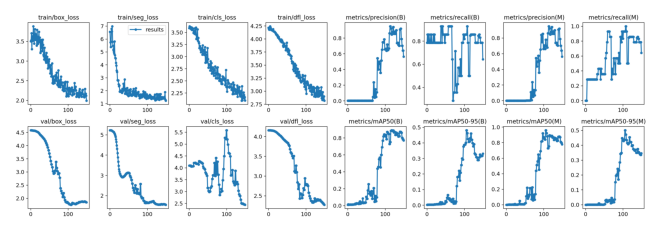

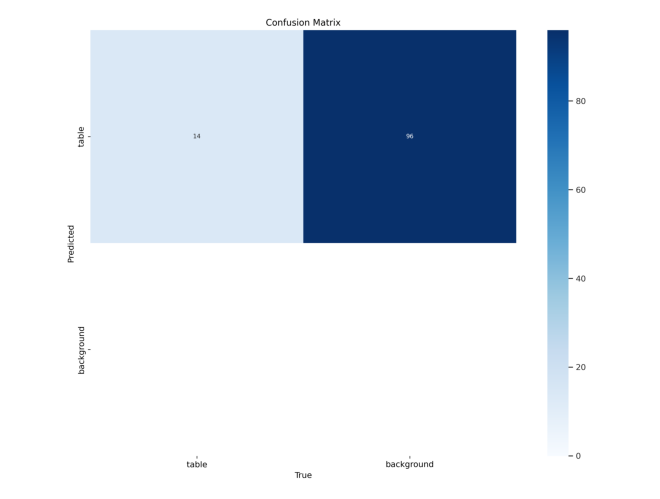

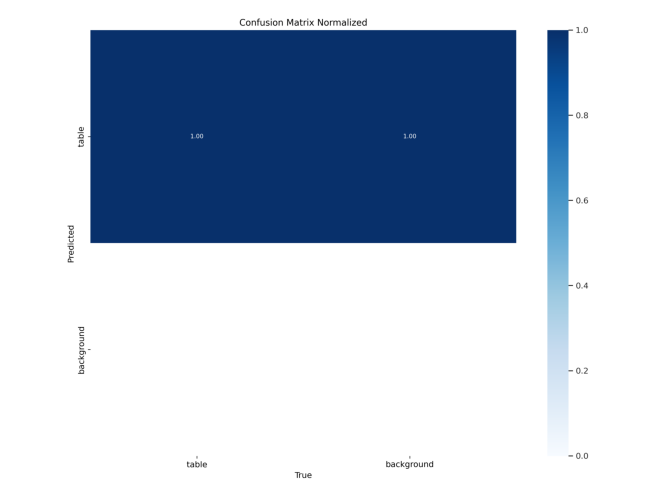

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
# model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
model.train(data='/content/drive/MyDrive/eFish/ocr.v2i.yolov8/data.yaml', epochs=150,
            batch=16,
            hsv_h=0, 
            hsv_s=0,
            hsv_v=0)
